In [1]:
#useful: https://github.com/fusion-flap/flap
import sys
sys.path.append('E:\marci main\Fusion\flap_module\flap')

import flap


import glob
import os
from scipy import io
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
import numpy as np
from scipy import signal
import copy
import time
import math

import scipy.signal
import scipy.fftpack
import scipy.integrate
import matplotlib.colors as colors

INIT flap storage


In [2]:
path ='E:\\marci main\\Fusion\\inputdata\\in\\'#pc
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

for filename in glob.glob(os.path.join(path, '*.sav')):
    loaded_sav = io.readsav(filename, python_dict = True)
    print('Loaded: '+filename)
    print('\n')
    
for i in range(loaded_sav["channels"].size):
    tmp = str(loaded_sav["channels"][i])
    loaded_sav["channels"][i] = tmp[2:-1]

print(loaded_sav["channels"])

Loaded: E:\marci main\Fusion\inputdata\in\AUGD_32326_MHA.sav


['MHA-B31-14' 'MHA-B31-03' 'MHA-B31-01' 'MHA-B31-02' 'MHA-B31-12'
 'MHA-B31-13' 'MHA-C04-01' 'MHA-C09-01_' 'MHA-B31-11' 'MHA-B31-10'
 'MHA-B31-09' 'MHA-B31-08' 'MHA-B31-07' 'MHA-B31-06' 'MHA-B31-05'
 'MHA-B31-30' 'MHA-C39-01' 'MHA-C09-26' 'MHA-C09-01' 'MHA-C09-02'
 'MHA-C09-03' 'MHA-C09-04' 'MHA-C09-05' 'MHA-C09-06']


In [3]:
#%%script false
print(list(loaded_sav))
print(loaded_sav["theta"])
print(loaded_sav['theta'].shape)

['expname', 'shotnumber', 'channels', 'data', 'timeax', 'theta', 'phi', 'data_history', 'coord_history']
[6.17551733 6.1713229  6.17503609 6.18079884 6.16854049 6.16368242
 0.09548085 0.09548085 1.3592542  0.55933898 0.35067104 0.13693282
 5.97365005 5.76863481 5.57244079 3.18239649 3.18239649 4.84553813
 0.09548085 0.28875074 0.47835904 0.70536641 0.98332641 1.23372214]
(24,)


In [4]:
print(loaded_sav["timeax"])
time_ax = flap.Coordinate(name="Time",
                          unit="s",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0.85,  #loaded_sav["timeax"][0],
                          step=0.000005,  #loaded_sav["timeax"][1]-loaded_sav["timeax"][0],
                          #values=loaded_sav["timeax"]
                          dimension_list=[1]
                         )

print(time_ax)
print(time_ax.unit.name)
print(time_ax.start)

[0.85      0.8500005 0.850001  ... 0.949999  0.9499995 0.95     ]
Time
0.85


In [5]:
channel_name = flap.Coordinate(name="Channels",
                          unit=None,
                          mode = flap.CoordinateMode(equidistant=False),
                          values=loaded_sav["channels"],
                          dimension_list=[0],
                          shape = len(loaded_sav["channels"])
                         )

channel_no = flap.Coordinate(name="Channel_no",
                          unit="no",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0,
                          step=1,
                          dimension_list=[0]
                         )

theta_ax =flap.Coordinate(name="Theta",
                          unit="rad",
                          mode = flap.CoordinateMode(equidistant=False),
                          values=loaded_sav["theta"],
                          dimension_list=[0],
                          shape = len(loaded_sav["theta"])
                         )

phi_ax =flap.Coordinate(name="Phi",
                          unit="rad",
                          mode = flap.CoordinateMode(equidistant=False),
                          values=loaded_sav["phi"],
                          dimension_list=[0],
                          shape = len(loaded_sav["phi"])
                         )

print(channel_name.values)

['MHA-B31-14' 'MHA-B31-03' 'MHA-B31-01' 'MHA-B31-02' 'MHA-B31-12'
 'MHA-B31-13' 'MHA-C04-01' 'MHA-C09-01_' 'MHA-B31-11' 'MHA-B31-10'
 'MHA-B31-09' 'MHA-B31-08' 'MHA-B31-07' 'MHA-B31-06' 'MHA-B31-05'
 'MHA-B31-30' 'MHA-C39-01' 'MHA-C09-26' 'MHA-C09-01' 'MHA-C09-02'
 'MHA-C09-03' 'MHA-C09-04' 'MHA-C09-05' 'MHA-C09-06']


In [6]:
flap_object= flap.DataObject(
                      data_array = loaded_sav['data'],
                      data_unit = flap.Unit(name= 'voltage', unit= 'volt'),
                      exp_id = str(loaded_sav['expname'])[2:-1],
                      coordinates = [time_ax,channel_name,channel_no,theta_ax,phi_ax],
                      data_shape=loaded_sav['data'].shape
                     )

In [7]:
print(flap_object.exp_id)
#type(flap_object.coordinate('Channel_no')[0][0,0])
flap_object.coordinate('Channel_no')

AUGD


(array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [21, 21, 21, ..., 21, 21, 21],
        [22, 22, 22, ..., 22, 22, 22],
        [23, 23, 23, ..., 23, 23, 23]]), None, None)

In [8]:
sliced_object = flap_object.slice_data(slicing={"Channel_no":int(3)}).slice_data(slicing={"Time":flap.Intervals(1.25,1.4)})
#short_dataobject = new_dataobject.slice_data(slicing={"Time":flap.Intervals(1.2,1.4)})

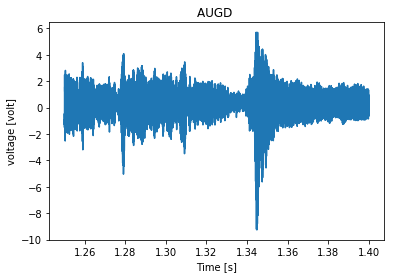

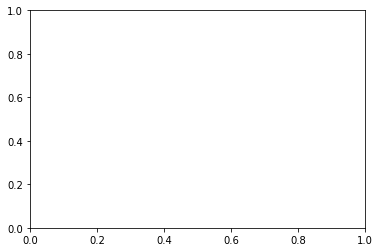

In [9]:
plt1 =sliced_object.plot()
#plt1.ylim(-6,2)

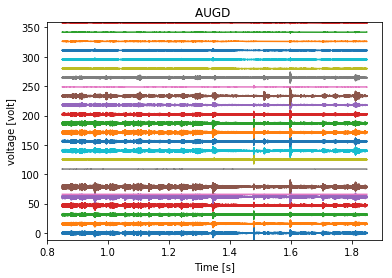

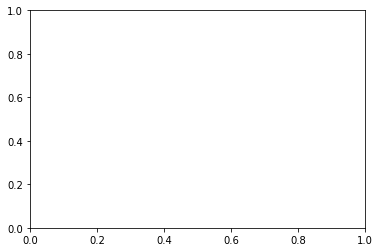

In [10]:
flap_object.plot(plot_type = 'multi xy')
#flap_object.plot(plot_type = 'image')
#flap_object.plot(plot_type = 'contour')

In [11]:
flap.list_data_objects(sliced_object)


-----------------------------
<1>(data_source:"" exp_id:"AUGD") data_title:"" shape:[29999][no error]
  Data name:"voltage", unit:"volt"
  Coords:
    'Time [s](Dims:0]) [<Equ.><R. symm.>] Start:  1.250E+00, Steps:  5.000E-06
    'Channels [a.u.](Dims:, Shape:[1]) [<R. symm.>] Val:MHA-B31-02
    'Channel_no [no](Dims:, Shape:[1]) [<R. symm.>] Val:3
    'Theta [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 6.181E+00
    'Phi [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 5.184E+00


'\n-----------------------------\n<1>(data_source:"" exp_id:"AUGD") data_title:"" shape:[29999][no error]\n  Data name:"voltage", unit:"volt"\n  Coords:\n    \'Time [s](Dims:0]) [<Equ.><R. symm.>] Start:  1.250E+00, Steps:  5.000E-06\n    \'Channels [a.u.](Dims:, Shape:[1]) [<R. symm.>] Val:MHA-B31-02\n    \'Channel_no [no](Dims:, Shape:[1]) [<R. symm.>] Val:3\n    \'Theta [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 6.181E+00\n    \'Phi [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 5.184E+00'

**Warning/ERROR: plot changes when coordinate start is 0 or 0.0 (int or double)**

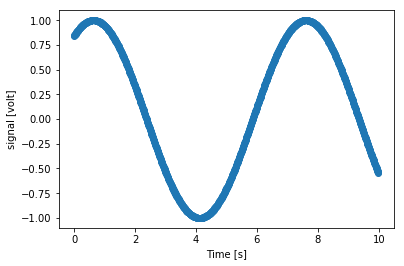

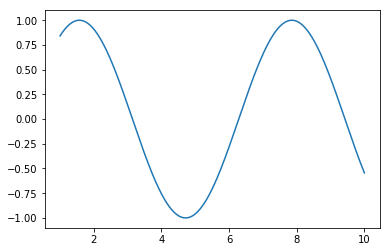

In [12]:
time_dummy = flap.Coordinate(name="Time",
                          unit="s",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0.0,
                          step=0.01,
                          #values=np.linspace(1,5,10)
                          dimension_list=[0]
                         )

data_array = np.sin(np.linspace(start=1,stop=10,num=1000))
x = np.linspace(start=1,stop=10,num=1000)

dummy= flap.DataObject(data_array = data_array,
                       data_unit = flap.Unit(name = "signal",unit = "volt"),#
                       coordinates = time_dummy,  #,value_dummy]
                       data_shape=data_array.shape
                     )

dummy.plot(plot_type = 'scatter')
plt.plot(x,data_array)

## Creating spectogram

In [13]:
min_t=min(sliced_object.coordinate('Time')[0])
max_t=max(sliced_object.coordinate('Time')[0])
t = max_t-min_t
print(t)
s=sliced_object.data
samples = np.size(sliced_object.data)
s_rate=samples/t

nyquist=samples/2/t
frangemax=nyquist#200#

0.14999000000000007


a


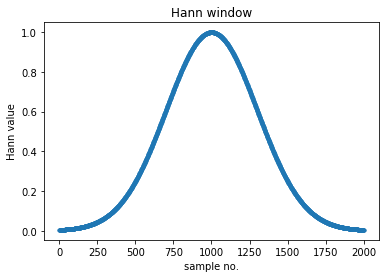

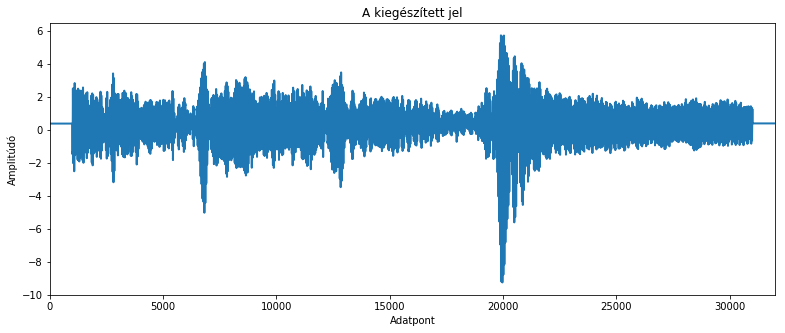

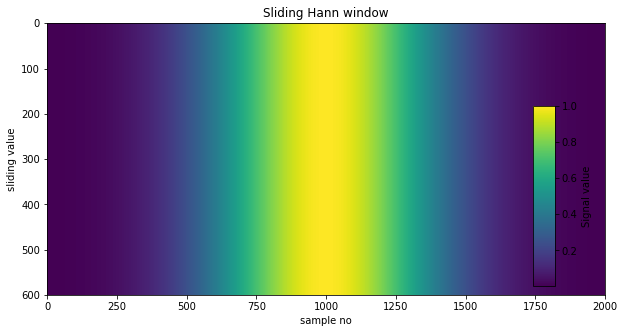

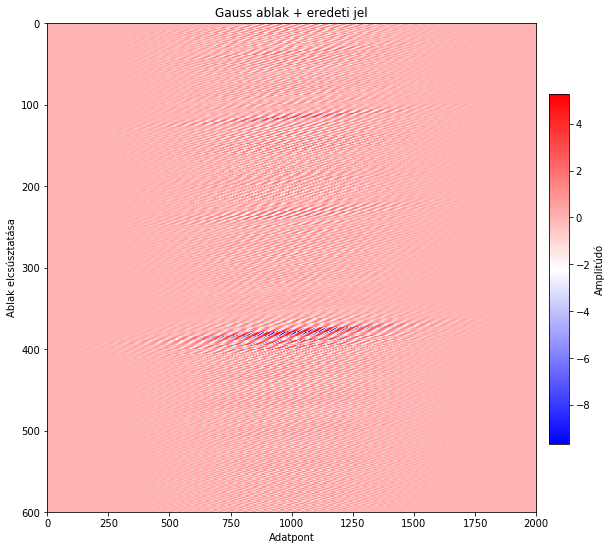

In [14]:
win_r = 1000 #1000
d_win=50#random.randint(200,300)
std=300 #150
win_base = scipy.signal.gaussian(2*win_r+1, std=std)#np.wining(2*win_r+1)

plt.plot(win_base,".-")
plt.title('Hann window')
plt.xlabel('sample no.')
plt.ylabel('Hann value')
#plt.show()

z_padded_s = np.zeros (samples+2*win_r)
z_padded_s[win_r:-win_r] = s
z_padded_s[0:win_r]=np.average(z_padded_s[win_r+1:2*win_r])
z_padded_s[-win_r:]=np.average(z_padded_s[-2*win_r:-win_r-1])
x_win=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

plt.figure(figsize=(13,5))
plt.plot(z_padded_s,"-",linewidth = 2)#x_win,idő (s),max(x_win)
plt.xlim((0,samples+2*win_r))
plt.title('A kiegészített jel')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
plt.savefig('sxr2_p.pdf')
#plt.show()

win = np.zeros((int(samples/d_win+1), 2*win_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

plt.figure(figsize=(10,5))
plt.imshow(win,aspect='auto')
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
#plt.show()

z_win = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i<1000001:
        z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1]-np.average(z_padded_s [d_win*i:d_win*i+win_r+win_r+1]))
    #z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1])

plt.figure(figsize=(9,9))
plt.imshow(z_win,aspect='auto',cmap='bwr')#, extent=(min_t*s_rate/d_win,max_t*s_rate/d_win,max_t*s_rate,min_t*s_rate)
plt.title('Gauss ablak + eredeti jel')
plt.xlabel('Adatpont')
plt.ylabel('Ablak elcsúsztatása')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.90, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig('z_win.pdf')
#plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i % 1000 == 0:
        print('a')
    if i<1000001:
        z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  

z_win_fft_cutted = np.zeros((int(samples/d_win),int(frangemax*(2*win_r+1)/s_rate) ))
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*win_r+1)/s_rate)): #int(frangemax*max(x_hann))
        z_win_fft_cutted [i][j] = z_win_fft [i][j]**2

In [15]:
%%script false
shot = ""

colornorm=colors.LogNorm(vmin=z_win_fft_cutted.min()*40000000, vmax=z_win_fft_cutted.max()/10)
logax = np.linspace(int(np.log10(z_win_fft_cutted.min())),int(np.log10(z_win_fft_cutted.max())),int(np.log10(z_win_fft_cutted.max()))-int(np.log10(z_win_fft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,5))
img = plt.imshow(z_win_fft_cutted,cmap='plasma',  aspect='auto', extent=[min_t,max_t,frangemax/1000,0], norm=colornorm)#interpolation='gaussian',*30000000/4
#plt.title('39424-es kisülés, J051-es szonda STFT-je')
plt.title(shot+' szonda saját felüláteresztős szűrt STFT-je')
#plt.title('AUGD 34924, B31-40-es szonda STFT-je')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
plt.ylim(20,0)
#plt.xlim(1.9,2.4)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#cbar.set_ticks(logax)
plt.savefig(shot+' '+str(min_t)+'-'+str(max_t)+' stft.pdf')#34924_40
plt.show()

#change plt to custom plotid

Couldn't find program: 'false'


Not Error: image plot fails if dataobject has more than 2 coordinate axes - use axes

Requested? feature: refer to coodrinate with name and transfer it

Warning/error: leftover variables - solved?: copy.deepcopy

In [16]:
#stft_time_ax=flap.Coordinate(name = sliced_object.coordinates[0].unit.name,
#                             unit = sliced_object.coordinates[0].unit.unit,
#                             start = sliced_object.coordinates[0].start,
#                             step = sliced_object.coordinates[0].step[0]*d_win,
#                             dimension_list=[0])

stft_ax=copy.deepcopy(sliced_object.coordinates)
print(len(stft_ax))
for i in range(len(stft_ax)):
    if stft_ax[i].unit.name == 'Time':
        stft_ax[i].step = sliced_object.coordinates[0].step[0]*d_win
        #running variable to object!
        #get_coordinate_object(self, name)

print(stft_ax[0].step[0]*int(samples/d_win))
print(sliced_object.coordinates[0].step[0]*len(sliced_object.data))
#print(stft_time_ax.dimension_list)
#print(nyquist)


stft_ax.append(flap.Coordinate(name="Frequency",
                          unit="kHz",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0.0,  #,
                          step=s_rate/(2*win_r+1)/1000,  #
                          dimension_list=[1]
                         ))

print(stft_ax[0].unit.name)

stft_object = flap.DataObject(
                      data_array = z_win_fft_cutted,
                      data_unit = flap.Unit(name= 'Power', unit= 'W'),
                      exp_id = str(loaded_sav['expname'])[2:-1],
                      coordinates = stft_ax, #[stft_ax[0],stft_ax[-1]],
                      data_shape=z_win_fft_cutted.shape
                     )

#stft_object.slice_data(slicing={"Frequency":flap.Intervals(0,10)}).plot(plot_type = 'image')
flap.list_data_objects(stft_object)

5
0.14975
0.14999500000000002
Time

-----------------------------
<1>(data_source:"" exp_id:"AUGD") data_title:"" shape:[599,1000][no error]
  Data name:"Power", unit:"W"
  Coords:
    'Time [s](Dims:0]) [<Equ.><R. symm.>] Start:  1.250E+00, Steps:  2.500E-04
    'Channels [a.u.](Dims:, Shape:[1]) [<R. symm.>] Val:MHA-B31-02
    'Channel_no [no](Dims:, Shape:[1]) [<R. symm.>] Val:3
    'Theta [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 6.181E+00
    'Phi [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 5.184E+00
    'Frequency [kHz](Dims:1]) [<Equ.><R. symm.>] Start:  0.000E+00, Steps:  9.995E-02


'\n-----------------------------\n<1>(data_source:"" exp_id:"AUGD") data_title:"" shape:[599,1000][no error]\n  Data name:"Power", unit:"W"\n  Coords:\n    \'Time [s](Dims:0]) [<Equ.><R. symm.>] Start:  1.250E+00, Steps:  2.500E-04\n    \'Channels [a.u.](Dims:, Shape:[1]) [<R. symm.>] Val:MHA-B31-02\n    \'Channel_no [no](Dims:, Shape:[1]) [<R. symm.>] Val:3\n    \'Theta [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 6.181E+00\n    \'Phi [rad](Dims:, Shape:[1]) [<R. symm.>] Val: 5.184E+00\n    \'Frequency [kHz](Dims:1]) [<Equ.><R. symm.>] Start:  0.000E+00, Steps:  9.995E-02'

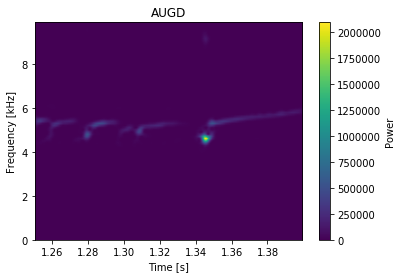

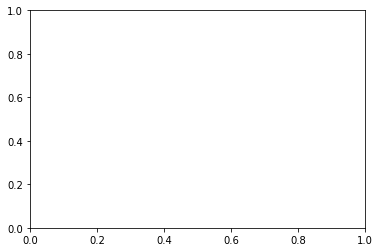

In [20]:
stft_object.slice_data(slicing={"Frequency":flap.Intervals(0,10)}).plot(axes = ['Time','Frequency'], plot_type = 'image')#

In [17]:
print(sliced_object.coordinate('Time'))
print(stft_object.coordinate('Time'))

(array([1.25    , 1.250005, 1.25001 , ..., 1.39998 , 1.399985, 1.39999 ]), None, None)
(array([[1.25   , 1.25   , 1.25   , ..., 1.25   , 1.25   , 1.25   ],
       [1.25025, 1.25025, 1.25025, ..., 1.25025, 1.25025, 1.25025],
       [1.2505 , 1.2505 , 1.2505 , ..., 1.2505 , 1.2505 , 1.2505 ],
       ...,
       [1.399  , 1.399  , 1.399  , ..., 1.399  , 1.399  , 1.399  ],
       [1.39925, 1.39925, 1.39925, ..., 1.39925, 1.39925, 1.39925],
       [1.3995 , 1.3995 , 1.3995 , ..., 1.3995 , 1.3995 , 1.3995 ]]), None, None)


In [18]:
%%script false

Használtunk fent egy flap.testdata.register()-t, és utána működött minden.

def register(data_source=None):
    if (data_source is None):
        data_source = 'TESTDATA'
    flap.register_data_source('TESTDATA',
                          get_data_func=testdata_get_data,
                          add_coord_func=add_coordinate)
    
User manual:
Writing a data source module
A data source module differs from a normal Python module in the in that it can provide a
few functions for the FLAP framework.

Ez nekünk egyenlőre nem feltétlenül kell, mert nem kívülről a flap-be akarunk bevinni dolgokat,
hanem kívülről kívülre(nti wavelet), csak épp eközban flap-be legyen. De fontos: 


Couldn't find program: 'false'
